# PROJET DE SEGMENTATION DES CLIENT: BANK MARKETING DATASET

In [959]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder,FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [960]:
#chargement du dataset
my_data=pd.read_csv('bank-full.csv')

In [961]:
#Modification du nom des colonnes
#Renommer mes colonnes en francais
my_data.rename(columns={
    'age': 'Âge',
    'job': 'Profession',
    'marital': 'État_Civil',
    'education': 'Niveau_Éducation',
    'default': 'Avoir_Crédit_Défaillant',
    'housing': 'Avoir_Pret_Logement',
    'loan': 'Avoir_Pret_Personnel',
    'contact': 'Type_Contact',
    'day': 'Jour_Contact',
    'month': 'Mois_Contact',
    'poutcome': 'Résultat_Campagne_Précédente',
    'y': 'Souscription_Dépôt_Terminé',
    'balance': 'Solde_Compte',
    'duration': 'Durée_Appel',
    'campaign': 'Nombre_Contacts_Campagne',
    'pdays': 'Jours_Dernier_Contact',
    'previous': 'Nombre_Contacts_Précédents'
}, inplace=True)

### A-Nettoyer et préparer les données Exploration des données

In [962]:
my_data.head()

Âge    Profession État_Civil Niveau_Éducation Avoir_Crédit_Défaillant  \
0   58    management    married         tertiary                      no   
1   44    technician     single        secondary                      no   
2   33  entrepreneur    married        secondary                      no   
3   47   blue-collar    married          unknown                      no   
4   33       unknown     single          unknown                      no   

   Solde_Compte Avoir_Pret_Logement Avoir_Pret_Personnel Type_Contact  \
0          2143                 yes                   no      unknown   
1            29                 yes                   no      unknown   
2             2                 yes                  yes      unknown   
3          1506                 yes                   no      unknown   
4             1                  no                   no      unknown   

   Jour_Contact Mois_Contact  Durée_Appel  Nombre_Contacts_Campagne  \
0             5          may          261                         1   
1             5          may          151                         1   
2             5          may           76                         1   
3             5          may           92                         1   
4             5          may          198                         1   

   Jours_Dernier_Contact  Nombre_Contacts_Précédents  \
0                     -1                           0   
1                     -1                           0   
2                     -1                           0   
3                     -1                           0   
4                     -1                           0   

  Résultat_Campagne_Précédente Souscription_Dépôt_Terminé  
0                      unknown                         no  
1                      unknown                         no  
2                      unknown                         no  
3                      unknown                         no  
4                      unknown                         no

In [963]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Âge                           45211 non-null  int64 
 1   Profession                    45211 non-null  object
 2   État_Civil                    45211 non-null  object
 3   Niveau_Éducation              45211 non-null  object
 4   Avoir_Crédit_Défaillant       45211 non-null  object
 5   Solde_Compte                  45211 non-null  int64 
 6   Avoir_Pret_Logement           45211 non-null  object
 7   Avoir_Pret_Personnel          45211 non-null  object
 8   Type_Contact                  45211 non-null  object
 9   Jour_Contact                  45211 non-null  int64 
 10  Mois_Contact                  45211 non-null  object
 11  Durée_Appel                   45211 non-null  int64 
 12  Nombre_Contacts_Campagne      45211 non-null  int64 
 13  Jours_Dernier_Co

Nous avons en tout 16 variables dont 7 sont entieres et le reste des categorielles.
Ces 7 variables numerique seront categorisées suivant les ecarts interquartils

Il y a aussi plusieurs variables categorielles que nous allons devoir les tranformer en numerique.

In [964]:
nb_unknown=(my_data=='unknown').sum()
print(nb_unknown)

Âge                                 0
Profession                        288
État_Civil                          0
Niveau_Éducation                 1857
Avoir_Crédit_Défaillant             0
Solde_Compte                        0
Avoir_Pret_Logement                 0
Avoir_Pret_Personnel                0
Type_Contact                    13020
Jour_Contact                        0
Mois_Contact                        0
Durée_Appel                         0
Nombre_Contacts_Campagne            0
Jours_Dernier_Contact               0
Nombre_Contacts_Précédents          0
Résultat_Campagne_Précédente    36959
Souscription_Dépôt_Terminé          0
dtype: int64


je remarque aussi que dans les variables Job, education, contact et poutcome il y a des valeurs manquante sous le nom de **unknown**. Nous allons les raplacer par NaN pour ensuite utiliser dropNaN pour retirer ces observations.

In [965]:
my_data.describe(include="all")

Âge   Profession État_Civil Niveau_Éducation  \
count   45211.000000        45211      45211            45211   
unique           NaN           12          3                4   
top              NaN  blue-collar    married        secondary   
freq             NaN         9732      27214            23202   
mean       40.936210          NaN        NaN              NaN   
std        10.618762          NaN        NaN              NaN   
min        18.000000          NaN        NaN              NaN   
25%        33.000000          NaN        NaN              NaN   
50%        39.000000          NaN        NaN              NaN   
75%        48.000000          NaN        NaN              NaN   
max        95.000000          NaN        NaN              NaN   

       Avoir_Crédit_Défaillant   Solde_Compte Avoir_Pret_Logement  \
count                    45211   45211.000000               45211   
unique                       2            NaN                   2   
top                         no            NaN                 yes   
freq                     44396            NaN               25130   
mean                       NaN    1362.272058                 NaN   
std                        NaN    3044.765829                 NaN   
min                        NaN   -8019.000000                 NaN   
25%                        NaN      72.000000                 NaN   
50%                        NaN     448.000000                 NaN   
75%                        NaN    1428.000000                 NaN   
max                        NaN  102127.000000                 NaN   

       Avoir_Pret_Personnel Type_Contact  Jour_Contact Mois_Contact  \
count                 45211        45211  45211.000000        45211   
unique                    2            3           NaN           12   
top                      no     cellular           NaN          may   
freq                  37967        29285           NaN        13766   
mean                    NaN          NaN     15.806419          NaN   
std                     NaN          NaN      8.322476          NaN   
min                     NaN          NaN      1.000000          NaN   
25%                     NaN          NaN      8.000000          NaN   
50%                     NaN          NaN     16.000000          NaN   
75%                     NaN          NaN     21.000000          NaN   
max                     NaN          NaN     31.000000          NaN   

         Durée_Appel  Nombre_Contacts_Campagne  Jours_Dernier_Contact  \
count   45211.000000              45211.000000           45211.000000   
unique           NaN                       NaN                    NaN   
top              NaN                       NaN                    NaN   
freq             NaN                       NaN                    NaN   
mean      258.163080                  2.763841              40.197828   
std       257.527812                  3.098021             100.128746   
min         0.000000                  1.000000              -1.000000   
25%       103.000000                  1.000000              -1.000000   
50%       180.000000                  2.000000              -1.000000   
75%       319.000000                  3.000000              -1.000000   
max      4918.000000                 63.000000             871.000000   

        Nombre_Contacts_Précédents Résultat_Campagne_Précédente  \
count                 45211.000000                        45211   
unique                         NaN                            4   
top                            NaN                      unknown   
freq                           NaN                        36959   
mean                      0.580323                          NaN   
std                       2.303441                          NaN   
min                       0.000000                          NaN   
25%                       0.000000                          NaN   
50%                       0.000000                          NaN   
75%    

In [966]:
print(my_data.isnull().sum())

Âge                             0
Profession                      0
État_Civil                      0
Niveau_Éducation                0
Avoir_Crédit_Défaillant         0
Solde_Compte                    0
Avoir_Pret_Logement             0
Avoir_Pret_Personnel            0
Type_Contact                    0
Jour_Contact                    0
Mois_Contact                    0
Durée_Appel                     0
Nombre_Contacts_Campagne        0
Jours_Dernier_Contact           0
Nombre_Contacts_Précédents      0
Résultat_Campagne_Précédente    0
Souscription_Dépôt_Terminé      0
dtype: int64


In [967]:
# On remplace les modalité unknown par NA ensuite on les supprimes du dataset
my_data.replace("unknown",pd.NA, inplace=True)
my_data.dropna(inplace=True)
print('le nombre d observation après suppression des valeurs manquantes est:', len(data))

le nombre d observation après suppression des valeurs manquantes est: 7842


In [968]:
my_data.head()

Âge  Profession État_Civil Niveau_Éducation Avoir_Crédit_Défaillant  \
24060   33      admin.    married         tertiary                      no   
24062   42      admin.     single        secondary                      no   
24064   33    services    married        secondary                      no   
24072   36  management    married         tertiary                      no   
24077   36  management    married         tertiary                      no   

       Solde_Compte Avoir_Pret_Logement Avoir_Pret_Personnel Type_Contact  \
24060           882                  no                   no    telephone   
24062          -247                 yes                  yes    telephone   
24064          3444                 yes                   no    telephone   
24072          2415                 yes                   no    telephone   
24077             0                 yes                   no    telephone   

       Jour_Contact Mois_Contact  Durée_Appel  Nombre_Contacts_Campagne  \
24060            21          oct           39                         1   
24062            21          oct          519                         1   
24064            21          oct          144                         1   
24072            22          oct           73                         1   
24077            23          oct          140                         1   

       Jours_Dernier_Contact  Nombre_Contacts_Précédents  \
24060                    151                           3   
24062                    166                           1   
24064                     91                           4   
24072                     86                           4   
24077                    143                           3   

      Résultat_Campagne_Précédente Souscription_Dépôt_Terminé  
24060                      failure                         no  
24062                        other                        yes  
24064                      failure                        yes  
24072                        other                         no  
24077                      failure                        yes

In [969]:
data=my_data.copy()

In [970]:
data.describe(include="all")

Âge  Profession État_Civil Niveau_Éducation  \
count   7842.000000        7842       7842             7842   
unique          NaN          11          3                3   
top             NaN  management    married        secondary   
freq            NaN        1753       4501             4197   
mean      40.783856         NaN        NaN              NaN   
std       11.282964         NaN        NaN              NaN   
min       18.000000         NaN        NaN              NaN   
25%       32.000000         NaN        NaN              NaN   
50%       38.000000         NaN        NaN              NaN   
75%       47.000000         NaN        NaN              NaN   
max       89.000000         NaN        NaN              NaN   

       Avoir_Crédit_Défaillant  Solde_Compte Avoir_Pret_Logement  \
count                     7842   7842.000000                7842   
unique                       2           NaN                   2   
top                         no           NaN                 yes   
freq                      7786           NaN                4942   
mean                       NaN   1552.343280                 NaN   
std                        NaN   3084.580003                 NaN   
min                        NaN  -1884.000000                 NaN   
25%                        NaN    162.000000                 NaN   
50%                        NaN    595.000000                 NaN   
75%                        NaN   1733.750000                 NaN   
max                        NaN  81204.000000                 NaN   

       Avoir_Pret_Personnel Type_Contact  Jour_Contact Mois_Contact  \
count                  7842         7842   7842.000000         7842   
unique                    2            2           NaN           12   
top                      no     cellular           NaN          may   
freq                   6753         7257           NaN         2436   
mean                    NaN          NaN     14.260010          NaN   
std                     NaN          NaN      7.885328          NaN   
min                     NaN          NaN      1.000000          NaN   
25%                     NaN          NaN      7.000000          NaN   
50%                     NaN          NaN     14.000000          NaN   
75%                     NaN          NaN     20.000000          NaN   
max                     NaN          NaN     31.000000          NaN   

        Durée_Appel  Nombre_Contacts_Campagne  Jours_Dernier_Contact  \
count   7842.000000               7842.000000            7842.000000   
unique          NaN                       NaN                    NaN   
top             NaN                       NaN                    NaN   
freq            NaN                       NaN                    NaN   
mean     261.290615                  2.064269             223.252869   
std      236.203272                  1.566109             111.830127   
min        5.000000                  1.000000               1.000000   
25%      113.000000                  1.000000             133.000000   
50%      194.000000                  2.000000             195.000000   
75%      324.000000                  2.000000             326.000000   
max     2219.000000                 16.000000             871.000000   

        Nombre_Contacts_Précédents Résultat_Campagne_Précédente  \
count                  7842.000000                         7842   
unique                         NaN                            3   
top                            NaN                      failure   
freq                           NaN                         4679   
mean                      3.184264                          NaN   
std                       4.614190                          NaN   
min                       1.000000                          NaN   
25%                       1.000000                          NaN   
50%                       2.000000                          NaN   
75%                       4.000000                    

In [971]:
continues_vars=[col for col in data.columns if data[col].dtype=="int64"]
categoricals_vars=[col for col in data.columns if data[col].dtype=="object"]

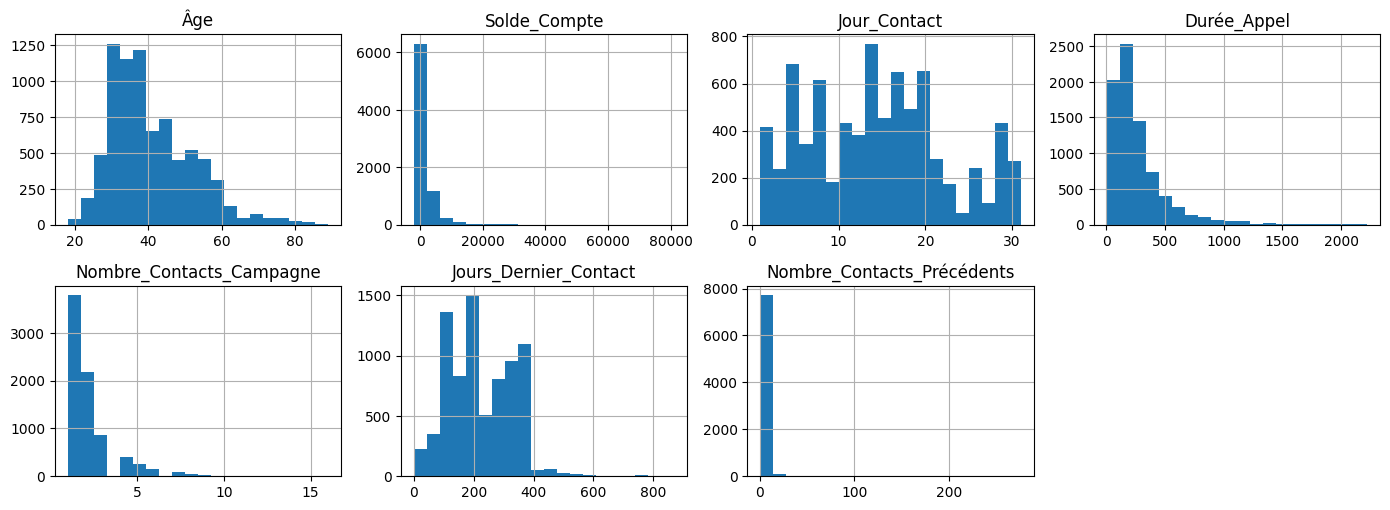

In [972]:
#distribution des variable continues
data[continues_vars].hist(bins=20, figsize=(14,10), layout=(4,4))
plt.tight_layout()
plt.show()


On remarque que la distribution des variables _balance_, _duration_, _campaign_, _pdays_, _previous_ est assymetrique, ce qui pourrait impacter notre algorith. Nous allons proce der à des tranformation.

La variable balance contient des valeur negatives, impossible de faire directement une tranformation logarithmique. Donc avant de proceder à cette tranformation, nous allons ajouter une constante aux observations de la variable pour rendre toutes les valeurs positives avant d'appliquer la transformation logarithmique.

In [973]:
min_Solde_Compte=data['Solde_Compte'].min()
constante=abs(min_Solde_Compte) + 1

#ajout de la constante
data['Solde_Compte_shefted']=data['Solde_Compte'] + constante

data.describe(include='all')

Âge  Profession État_Civil Niveau_Éducation  \
count   7842.000000        7842       7842             7842   
unique          NaN          11          3                3   
top             NaN  management    married        secondary   
freq            NaN        1753       4501             4197   
mean      40.783856         NaN        NaN              NaN   
std       11.282964         NaN        NaN              NaN   
min       18.000000         NaN        NaN              NaN   
25%       32.000000         NaN        NaN              NaN   
50%       38.000000         NaN        NaN              NaN   
75%       47.000000         NaN        NaN              NaN   
max       89.000000         NaN        NaN              NaN   

       Avoir_Crédit_Défaillant  Solde_Compte Avoir_Pret_Logement  \
count                     7842   7842.000000                7842   
unique                       2           NaN                   2   
top                         no           NaN                 yes   
freq                      7786           NaN                4942   
mean                       NaN   1552.343280                 NaN   
std                        NaN   3084.580003                 NaN   
min                        NaN  -1884.000000                 NaN   
25%                        NaN    162.000000                 NaN   
50%                        NaN    595.000000                 NaN   
75%                        NaN   1733.750000                 NaN   
max                        NaN  81204.000000                 NaN   

       Avoir_Pret_Personnel Type_Contact  Jour_Contact Mois_Contact  \
count                  7842         7842   7842.000000         7842   
unique                    2            2           NaN           12   
top                      no     cellular           NaN          may   
freq                   6753         7257           NaN         2436   
mean                    NaN          NaN     14.260010          NaN   
std                     NaN          NaN      7.885328          NaN   
min                     NaN          NaN      1.000000          NaN   
25%                     NaN          NaN      7.000000          NaN   
50%                     NaN          NaN     14.000000          NaN   
75%                     NaN          NaN     20.000000          NaN   
max                     NaN          NaN     31.000000          NaN   

        Durée_Appel  Nombre_Contacts_Campagne  Jours_Dernier_Contact  \
count   7842.000000               7842.000000            7842.000000   
unique          NaN                       NaN                    NaN   
top             NaN                       NaN                    NaN   
freq            NaN                       NaN                    NaN   
mean     261.290615                  2.064269             223.252869   
std      236.203272                  1.566109             111.830127   
min        5.000000                  1.000000               1.000000   
25%      113.000000                  1.000000             133.000000   
50%      194.000000                  2.000000             195.000000   
75%      324.000000                  2.000000             326.000000   
max     2219.000000                 16.000000             871.000000   

        Nombre_Contacts_Précédents Résultat_Campagne_Précédente  \
count                  7842.000000                         7842   
unique                         NaN                            3   
top                            NaN                      failure   
freq                           NaN                         4679   
mean                      3.184264                          NaN   
std                       4.614190                          NaN   
min                       1.000000                          NaN   
25%                       1.000000                          NaN   
50%                       2.000000                          NaN   
75%                       4.000000                    

In [974]:
data=data.drop(columns=['Souscription_Dépôt_Terminé'],axis=1)

In [975]:
data_new=data.drop(columns=['Solde_Compte'],axis=1)

In [976]:
asym_vars=['Solde_Compte_shefted','Durée_Appel','Nombre_Contacts_Campagne','Jours_Dernier_Contact','Nombre_Contacts_Précédents']
for col in asym_vars:
    data_new[f'{col}_log']=np.log1p(data_new[col])

['Âge', 'Jour_Contact', 'Durée_Appel', 'Nombre_Contacts_Campagne', 'Jours_Dernier_Contact', 'Nombre_Contacts_Précédents', 'Solde_Compte_shefted', 'Solde_Compte_shefted_log', 'Durée_Appel_log', 'Nombre_Contacts_Campagne_log', 'Jours_Dernier_Contact_log', 'Nombre_Contacts_Précédents_log']


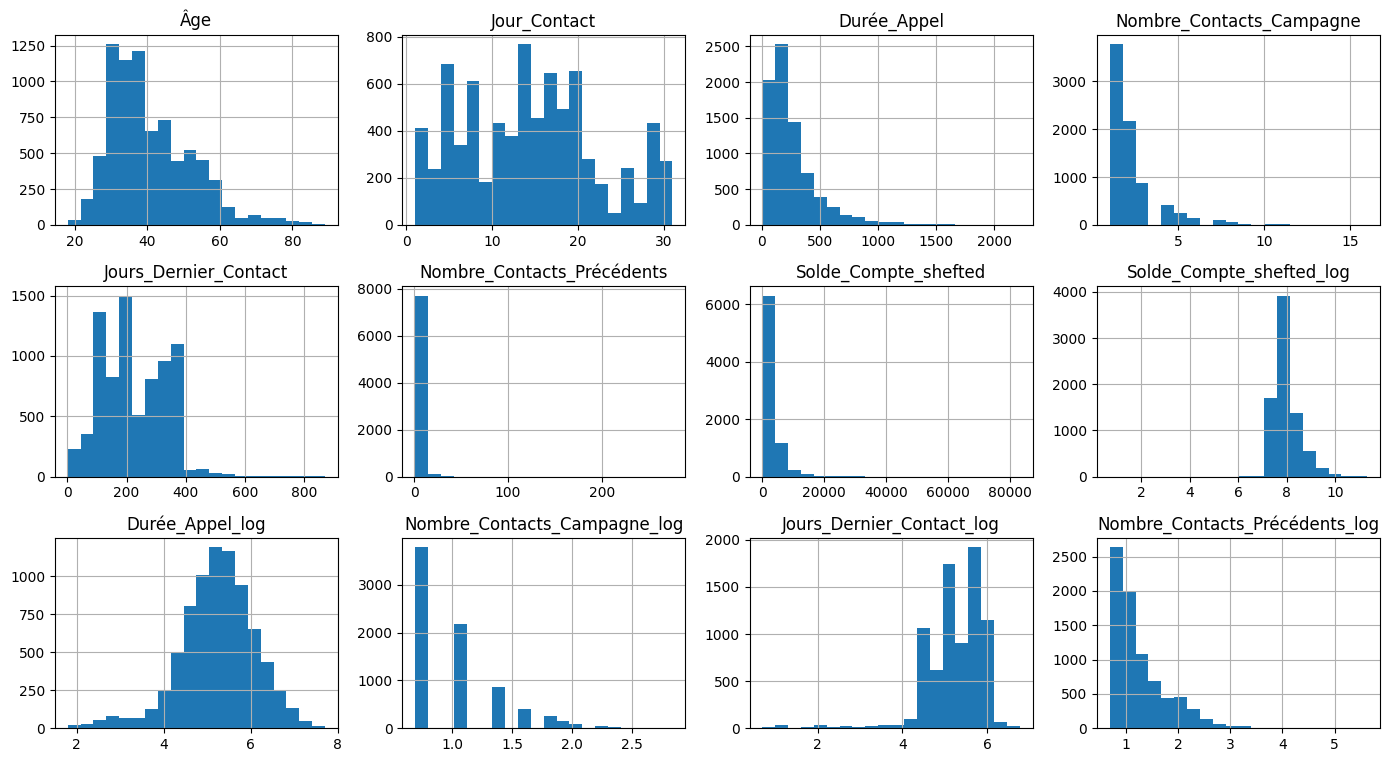

In [977]:
continues_vars_new=[col for col in data_new.columns if data_new[col].dtype=="int64" or data_new[col].dtype=='float']
print(continues_vars_new)

data_new[continues_vars_new].hist(bins=20, figsize=(14,10), layout=(4,4))
plt.tight_layout()
plt.show()

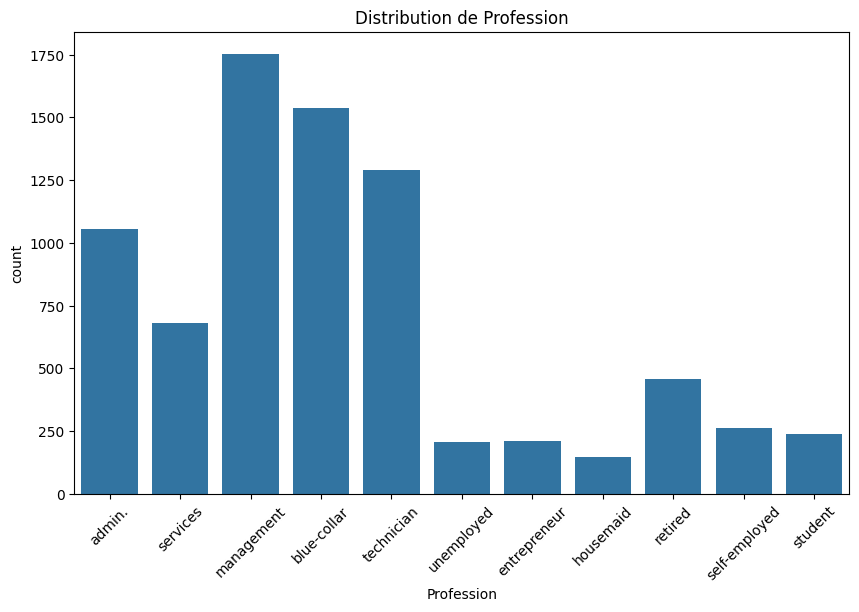

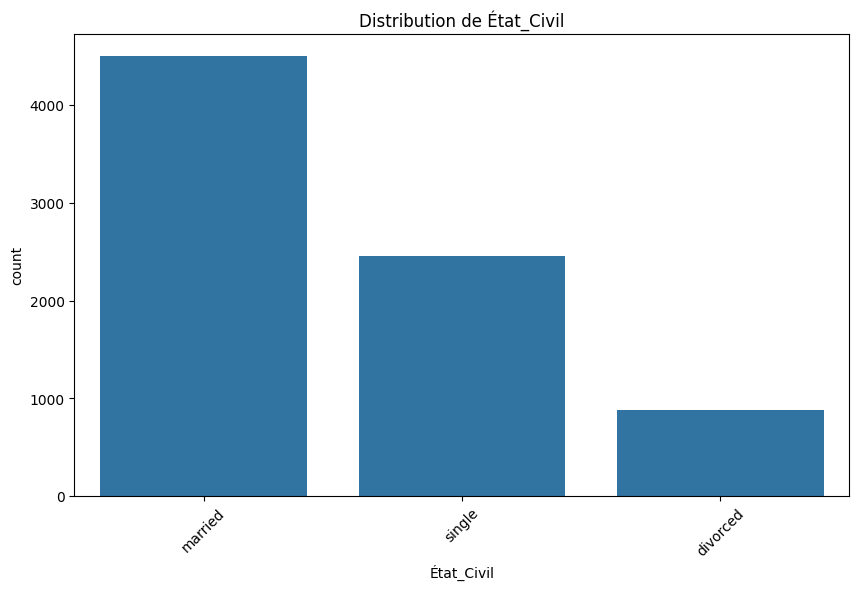

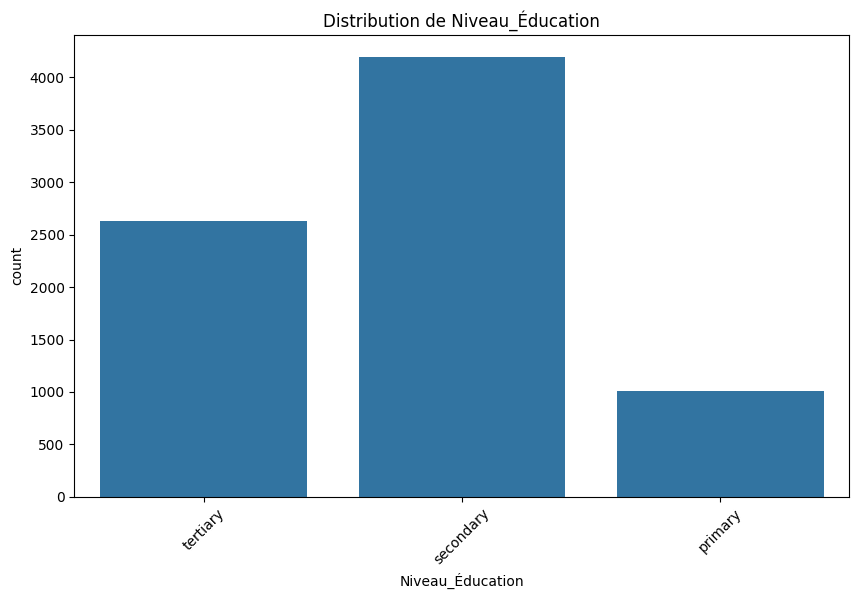

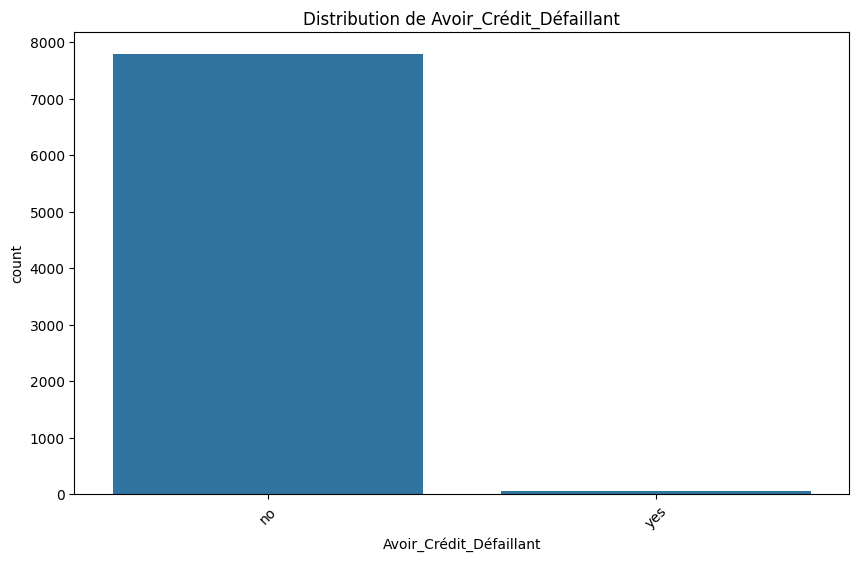

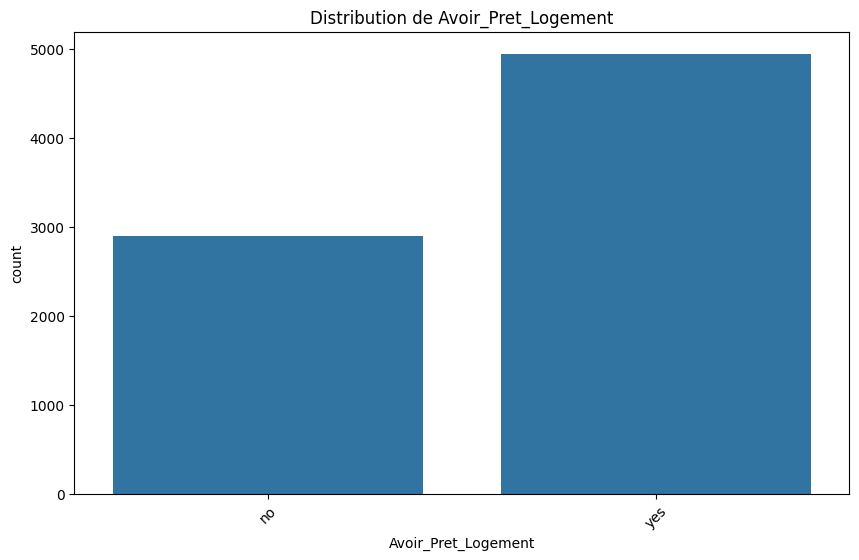

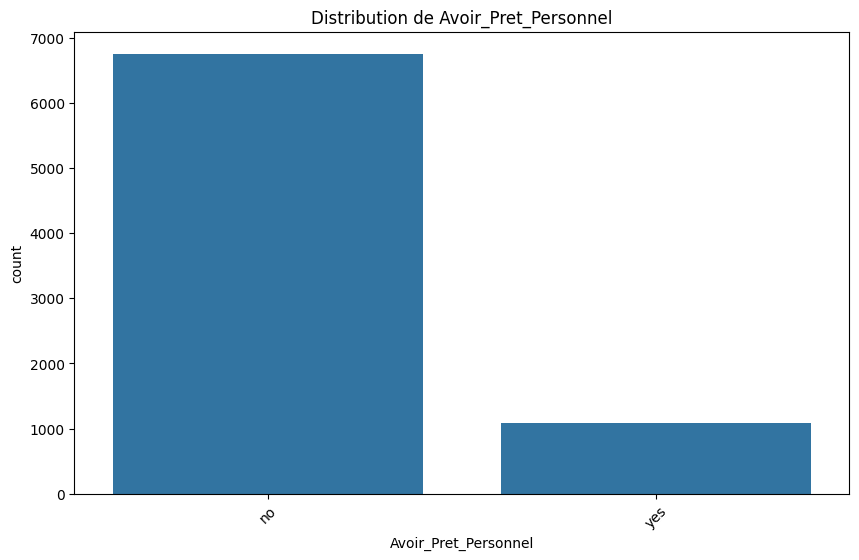

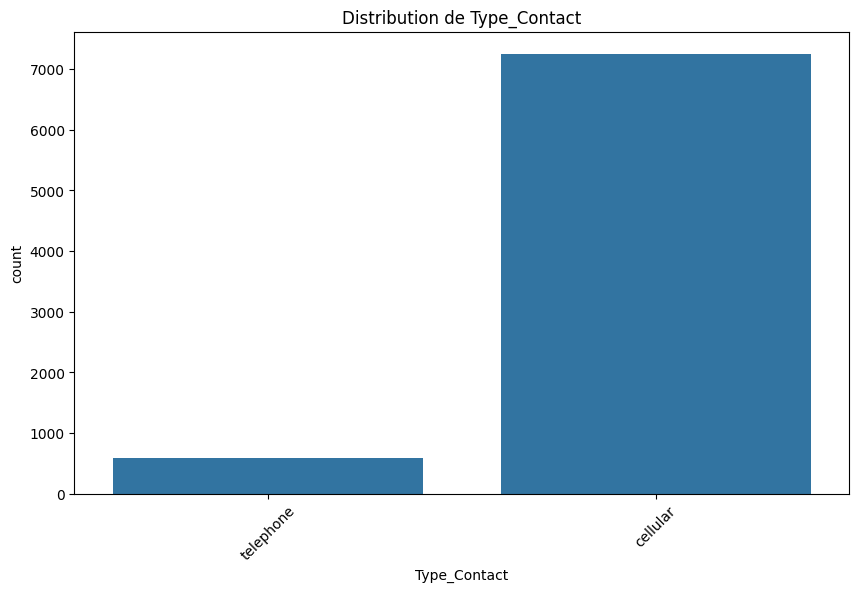

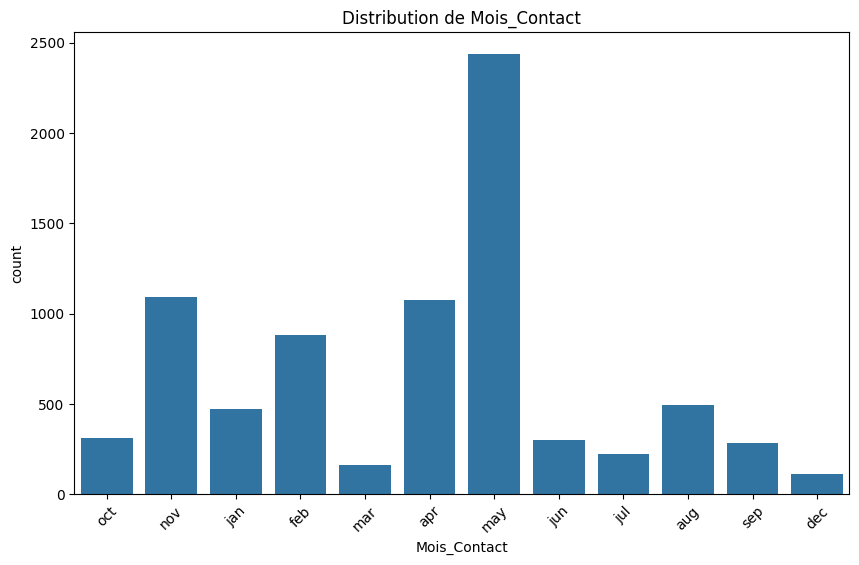

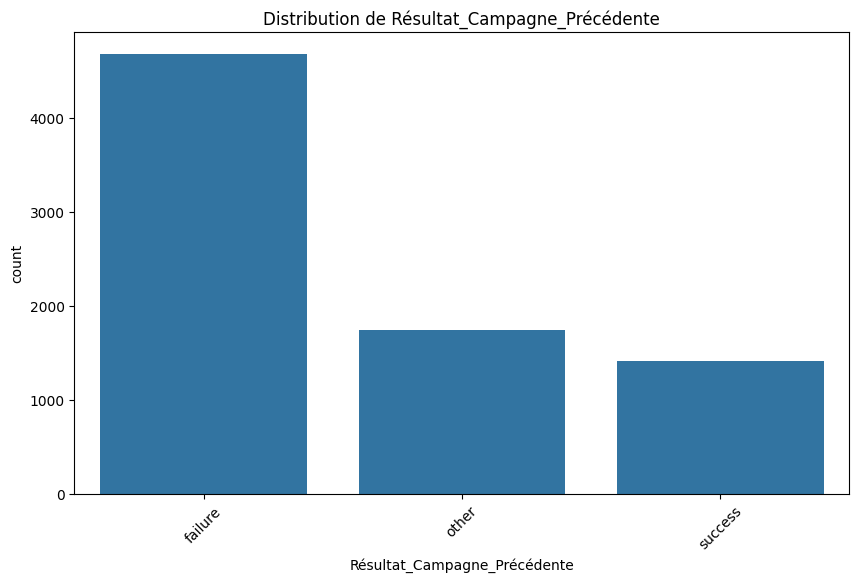

In [980]:
new_categorical_vars=[col for col in data_new if data_new[col].dtype=='object']

for col in new_categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=data_new[col])
    plt.title(f'Distribution de {col}')
    plt.xticks(rotation=45)
    plt.show()

# Interprétation des Graphes

## Variables Numériques

### Age
- La majorité des clients ont entre 30 et 40 ans.
- Très peu de clients ont plus de 60 ans ou moins de 20 ans.
- La banque semble cibler principalement des adultes en milieu de carrière, qui sont susceptibles d'avoir des besoins financiers actifs et stables.

### Balance
- La distribution des soldes avant transformation montre une forte asymétrie avec beaucoup de clients ayant des soldes très bas et quelques-uns avec des soldes très élevés.
- Après transformation logarithmique, la distribution est plus normalisée, indiquant que les soldes varient largement mais la plupart des clients ont des soldes faibles.
- Cette variation pourrait suggérer une clientèle diverse en termes de richesse, mais majoritairement constituée de personnes avec des soldes de comptes modestes.

### Duration
- La durée des appels est fortement biaisée vers les durées courtes.
- La transformation logarithmique normalise cette distribution.
- Cela indique que les appels sont généralement brefs, ce qui pourrait influencer l'efficacité des campagnes marketing.

### Campaign
- La plupart des clients ont été contactés une ou deux fois, avec très peu de contacts au-delà.
- La transformation logarithmique améliore la distribution, mais la tendance reste la même.
- Cela suggère que les campagnes ont une portée limitée en termes de nombre de contacts par client, peut-être en raison de la stratégie ou des contraintes opérationnelles.

### Pdays
- Les jours depuis le dernier contact montrent des pics autour de certaines valeurs, indiquant des périodes spécifiques de contact.
- La transformation logarithmique n'uniformise pas complètement la distribution.
- Il peut y avoir des cycles de contact spécifiques à analyser pour comprendre les périodes de haute activité.

### Previous
- La majorité des clients n'ont eu aucun contact précédent, avec quelques-uns ayant plusieurs contacts.
- La transformation logarithmique montre une meilleure répartition.
- Cela indique que la plupart des clients sont relativement nouveaux ou peu contactés auparavant, ce qui pourrait influencer leur réponse aux campagnes.

## Variables Catégorielles

### Job
- Les professions les plus courantes sont `management`, `blue-collar`, et `technician`.
- Cela indique que la banque attire des clients avec des emplois stables et potentiellement bien rémunérés.

### Marital
- La majorité des clients sont `married`, suivis de `single` et `divorced`.
- Une population mature et stable, potentiellement avec des engagements financiers plus élevés.

### Education
- La plupart des clients ont un niveau d'éducation `secondary`, suivi de `tertiary` et `primary`.
- Un niveau d'éducation secondaire ou tertiaire peut indiquer une meilleure gestion financière et un accès accru à l'information.

### Default
- La grande majorité des clients n'ont pas de défaut (`no`).
- Une population de clients relativement fiable en termes de crédit.

### Housing
- Une proportion significative des clients ont un crédit logement (`yes`).
- Cela peut influencer les offres de produits financiers proposés par la banque, avec un accent sur les crédits logement.

### Loan
- La majorité des clients n'ont pas de prêt personnel (`no`).
- Cela peut indiquer une capacité à gérer les finances sans recourir à des prêts personnels fréquents.

### Contact
- La majorité des contacts sont réalisés via `cellular`.
- Cela reflète les tendances modernes de communication mobile.

### Month
- Le mois de `may` a le plus grand nombre de contacts, suivi de `nov` et `apr`.
- Les campagnes semblent plus intensives à certaines périodes de l'année, suggérant des cycles d'activité spécifiques.

### Poutcome
- La majorité des clients ont eu un résultat de campagne précédent considéré comme un échec (`failure`).
- Très peu de clients ont eu un résultat de campagne précédent réussi (`success`).
- Cela indique que les campagnes précédentes n'ont pas été très efficaces pour la majorité des clients.

### y
- La majorité des clients n'ont pas souscrit à un dépôt à terme (`no`).
- Une minorité de clients ont souscrit à un dépôt à terme (`yes`).
- Cela montre que la campagne actuelle n'a pas été très réussie pour la plupart des clients contactés.

## Conclusion et Recommandations

### Profil Client
- Les clients de la banque sont principalement des adultes en milieu de carrière, mariés, avec une éducation secondaire ou tertiaire, et occupent des professions stables.
- La majorité des clients ont des soldes de comptes faibles à modérés, et la durée des appels est généralement courte.

### Efficacité des Campagnes
- Les campagnes marketing précédentes ont souvent échoué, et la campagne actuelle a également un faible taux de succès.
- Il est crucial d'analyser les raisons de ces échecs et de repenser les stratégies marketing.

### Stratégies de Communication
- La communication via téléphone cellulaire est la plus courante et devrait être maintenue.
- La distribution des contacts pourrait être équilibrée tout au long de l'année pour maximiser l'engagement.

### Segmentation et Personnalisation
- Une segmentation plus fine des clients basée sur les caractéristiques démographiques et comportementales peut aider à personnaliser les offres et améliorer les taux de conversion.
- Les clients ayant un historique de succès dans les campagnes précédentes devraient être analysés pour comprendre les facteurs de succès.

In [981]:
df=data_new.drop(columns=['Solde_Compte_shefted','Durée_Appel','Nombre_Contacts_Campagne','Jours_Dernier_Contact','Nombre_Contacts_Précédents'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7842 entries, 24060 to 45210
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Âge                             7842 non-null   int64  
 1   Profession                      7842 non-null   object 
 2   État_Civil                      7842 non-null   object 
 3   Niveau_Éducation                7842 non-null   object 
 4   Avoir_Crédit_Défaillant         7842 non-null   object 
 5   Avoir_Pret_Logement             7842 non-null   object 
 6   Avoir_Pret_Personnel            7842 non-null   object 
 7   Type_Contact                    7842 non-null   object 
 8   Jour_Contact                    7842 non-null   int64  
 9   Mois_Contact                    7842 non-null   object 
 10  Résultat_Campagne_Précédente    7842 non-null   object 
 11  Solde_Compte_shefted_log        7842 non-null   float64
 12  Durée_Appel_log                 78

In [982]:
#df=df.drop(columns=['y'])

In [983]:
continues_vars_new_new=[col for col in df.columns if df[col].dtype=="int64" or df[col].dtype=='float']
categorical_vars_new_new=[col for col in df.columns if df[col].dtype=='object']
print(categorical_vars_new_new)


['Profession', 'État_Civil', 'Niveau_Éducation', 'Avoir_Crédit_Défaillant', 'Avoir_Pret_Logement', 'Avoir_Pret_Personnel', 'Type_Contact', 'Mois_Contact', 'Résultat_Campagne_Précédente']


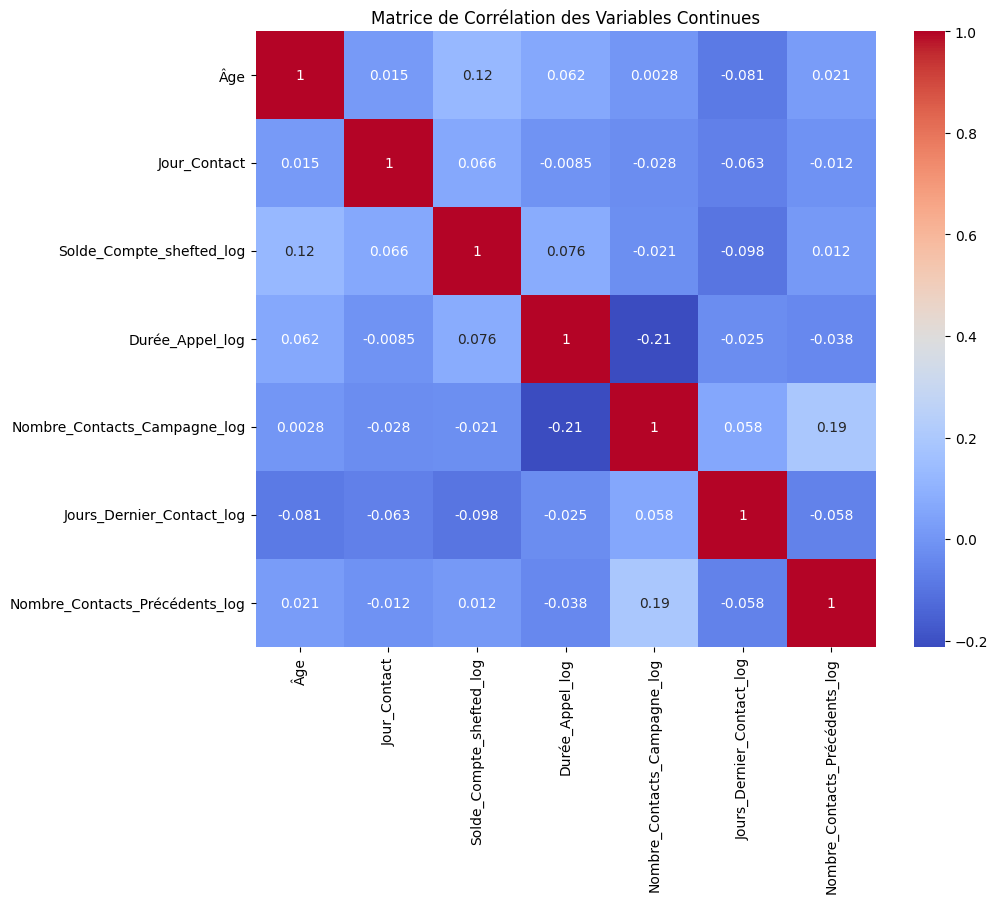

In [984]:
corr_matrix=df[continues_vars_new_new].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")
plt.title("Matrice de Corrélation des Variables Continues")
plt.show()

La matrice de corrélation  justifie l'inclusion des variables sélectionnées dans le modèle de clustering, car elles apportent toutes des informations uniques et pertinentes pour la segmentation des clients. Les points clés de cette analyse sont :

- **Age**, **balance_shefted_log**, **duration_log**, **campaign_log**, **pdays_log**, et **previous_log** montrent des corrélations faibles entre elles, indiquant que chaque variable apporte une perspective différente sur les clients.
- Les corrélations faibles entre les variables suggèrent que chacune d'elles contribue de manière unique au modèle de clustering, rendant le modèle plus robuste et explicatif.

In [985]:
# Sélection des variables
numerical_features=continues_vars_new_new
categorical_features=categorical_vars_new_new

#Pipeline de tranformation
preprocessor=ColumnTransformer(
    transformers=[
        ('num', StandardScaler(),numerical_features),
        ('cat',OneHotEncoder(),categorical_features)
    ])


#Transformation des données
pipeline=Pipeline(steps=[('preprocessor',preprocessor)])

processed_data=pipeline.fit_transform(df)

## Reduction de dimension avec ACP(Analyse en COmposentes Principales)

In [986]:
# Réduction des dimensions des données à 2D en utilisant PCA
pca=PCA(n_components=3)
principal_component=pca.fit_transform(processed_data)

In [987]:
df_pca=pd.DataFrame(principal_component, columns=['PCA1','PCA2','PCA3'])
df_pca

PCA1      PCA2      PCA3
0    -0.024256  0.376735 -1.326324
1    -0.327390 -1.548163 -0.428870
2    -0.851282  0.276548 -1.095640
3    -0.829626  0.814166 -1.468284
4    -0.098076 -0.243723 -1.029981
...        ...       ...       ...
7837  0.642406  0.623633  0.109395
7838 -1.357835  0.277095  0.269780
7839 -3.341596  1.820279  0.969228
7840 -2.672176  1.795171  2.114862
7841 -0.803860  1.392540 -0.351445

[7842 rows x 3 columns]

In [988]:
from mpl_toolkits.mplot3d import Axes3D

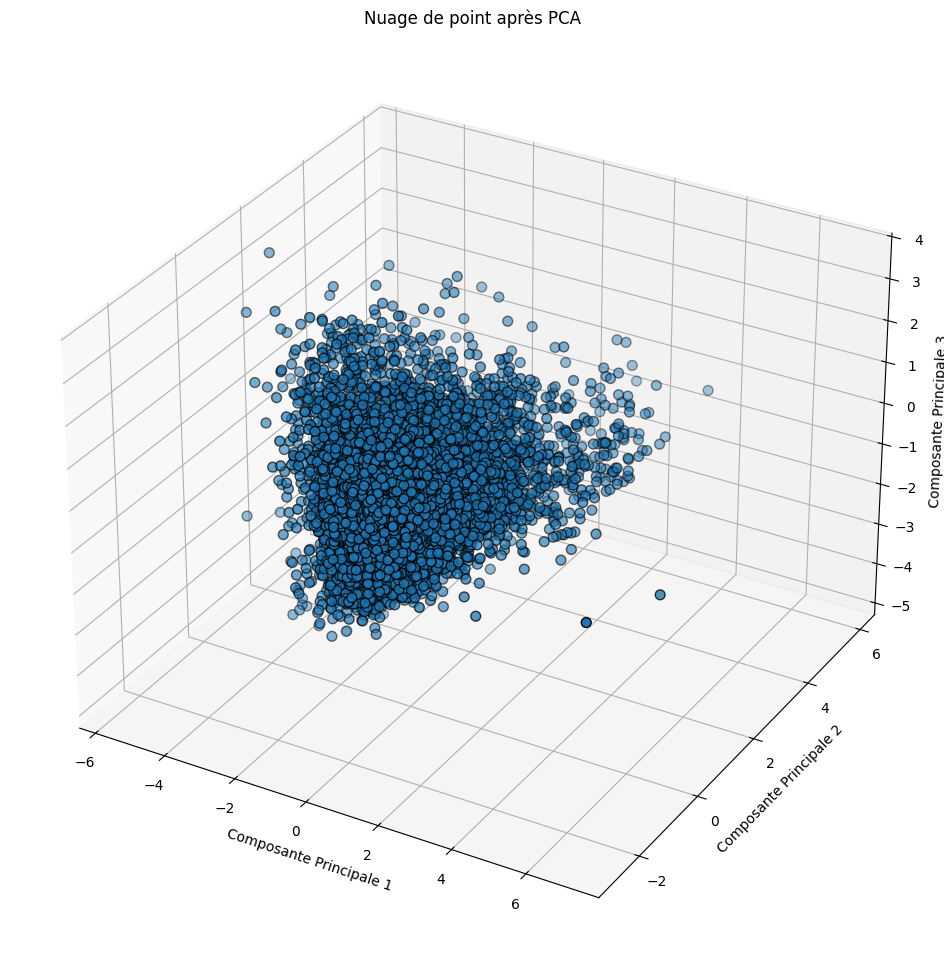

In [989]:
# Visualisation du nuage

# Crééation d'une figure 3D
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

scatter=ax.scatter(df_pca['PCA1'],df_pca['PCA2'],df_pca['PCA3'],edgecolors='k',s=50)

ax.set_xlabel('Composante Principale 1')
ax.set_ylabel('Composante Principale 2')
ax.set_zlabel('Composante Principale 3')
plt.title('Nuage de point après PCA')
plt.show()

## Clustering

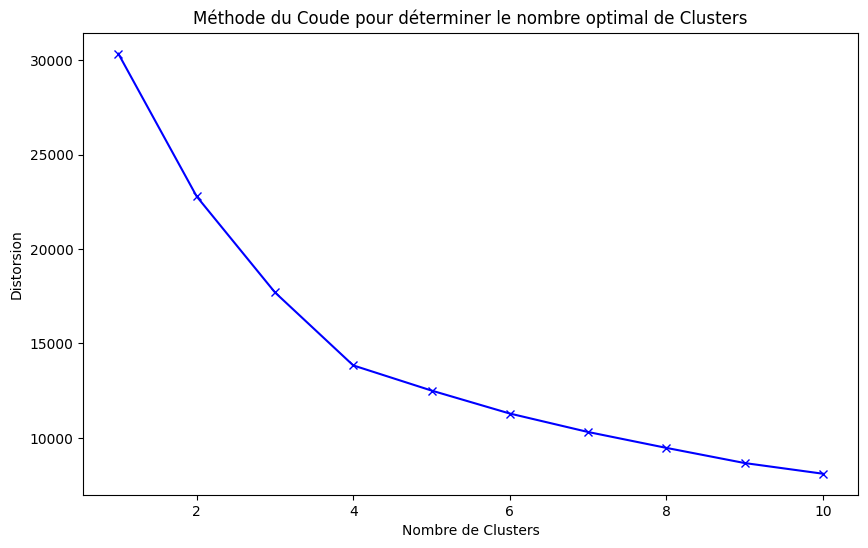

In [990]:
#Determination du nombre possible de cluster
distortions=[]
K=range(1,11)
for k in K:
    cluster_kmeans=KMeans(n_clusters=k, random_state=42)
    cluster_kmeans.fit(df_pca)
    distortions.append(cluster_kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(K, distortions,'bx-')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Distorsion')
plt.title('Méthode du Coude pour déterminer le nombre optimal de Clusters')
plt.show()


D'après le graphique de la méthode du coude, il semble que le "coude" se situe autour de 4 clusters. C'est là où l'inertie commence à diminuer de manière moins prononcée. Pour confirmer ce choix, nous pouvons également vérifier le score de silhouette pour différents nombres de clusters.

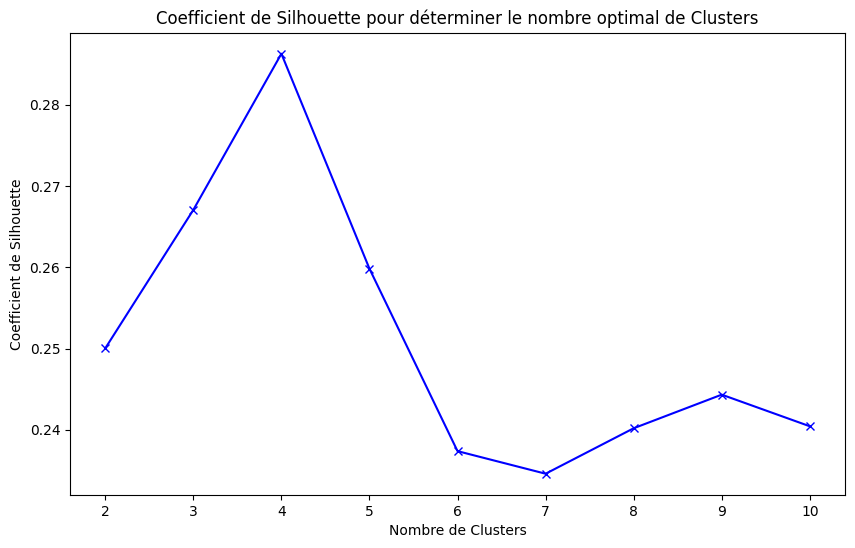

In [991]:
# Calcul et visualisation du score de silhouette pour différents nombres de clusters
silhouette_scores = []
K = range(2, 11)  # commence à 2 car silhouette score n'est pas défini pour 1 cluster

for k in K:
    silhouette_kmeans = KMeans(n_clusters=k, random_state=42)
    silhouette_kmeans.fit(df_pca)
    score = silhouette_score(df_pca, silhouette_kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Coefficient de Silhouette')
plt.title('Coefficient de Silhouette pour déterminer le nombre optimal de Clusters')
plt.show()


D'après le graphique du coefficient de silhouette, il semble que le nombre optimal de clusters soit 4, car c'est à ce point que le coefficient de silhouette atteint son maximum.


**En conclusion le nombre de cluster idéal est 4**

### Application de la méthode de Kmeans

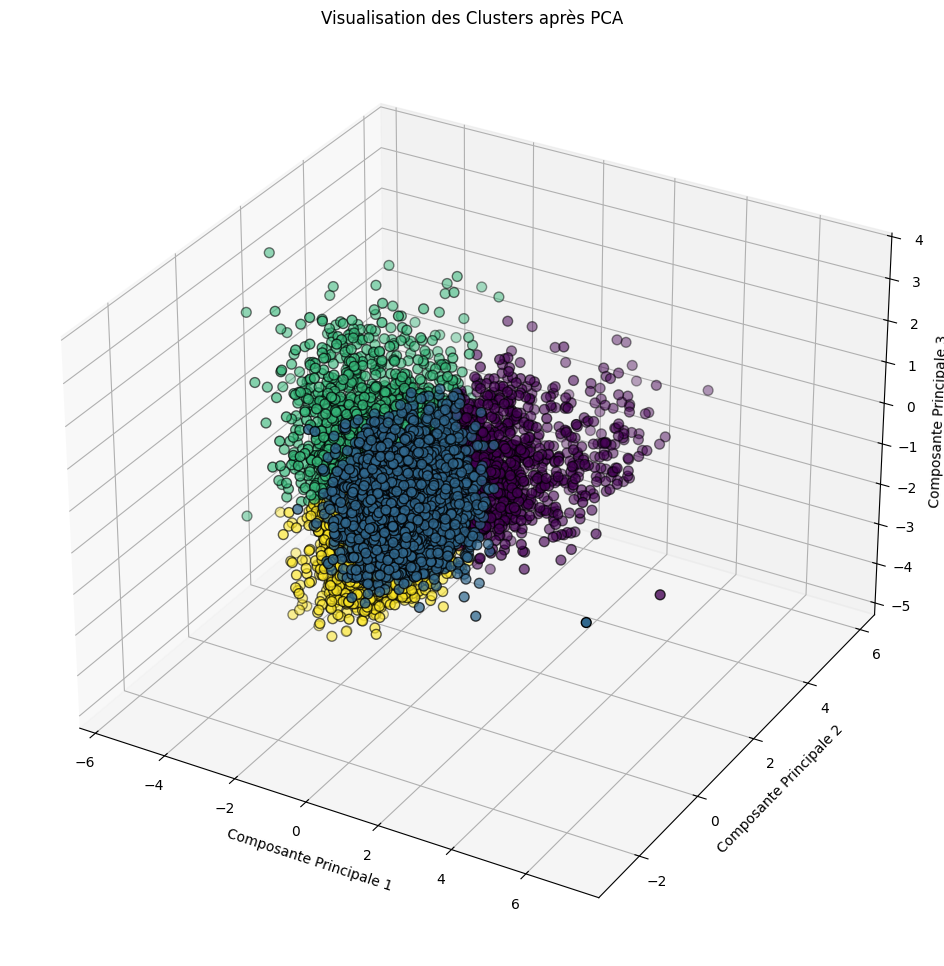

In [992]:
optimal_k=4
kmeans=KMeans(n_clusters=optimal_k, random_state=42)
clusters=kmeans.fit_predict(df_pca)

#ajout des cluster au df_pca
df_pca['clusters']=clusters

#Graphique
fig=plt.figure(figsize=(16,12))
ax=fig.add_subplot(111,projection='3d')
scatter=ax.scatter(df_pca['PCA1'],df_pca['PCA2'],df_pca['PCA3'],c=df_pca['clusters'],cmap='viridis', edgecolor='k', s=50)
ax.set_xlabel('Composante Principale 1')
ax.set_ylabel('Composante Principale 2')
ax.set_zlabel('Composante Principale 3')
plt.title('Visualisation des Clusters après PCA')
plt.show()


### Analyse de chaque Cluster

In [993]:
#Calcul du score de silhouette par cluster
silhouette_avg=silhouette_score(df_pca,clusters)
print(silhouette_avg)

0.40326086819287793


In [994]:
# Ajout des clusters au DataFrame original
df['clusters']=clusters
df

Âge    Profession État_Civil Niveau_Éducation Avoir_Crédit_Défaillant  \
24060   33        admin.    married         tertiary                      no   
24062   42        admin.     single        secondary                      no   
24064   33      services    married        secondary                      no   
24072   36    management    married         tertiary                      no   
24077   36    management    married         tertiary                      no   
...    ...           ...        ...              ...                     ...   
45199   34   blue-collar     single        secondary                      no   
45201   53    management    married         tertiary                      no   
45204   73       retired    married        secondary                      no   
45208   72       retired    married        secondary                      no   
45210   37  entrepreneur    married        secondary                      no   

      Avoir_Pret_Logement Avoir_Pret_Personnel Type_Contact  Jour_Contact  \
24060                  no                   no    telephone            21   
24062                 yes                  yes    telephone            21   
24064                 yes                   no    telephone            21   
24072                 yes                   no    telephone            22   
24077                 yes                   no    telephone            23   
...                   ...                  ...          ...           ...   
45199                 yes                   no     cellular            16   
45201                  no                   no     cellular            17   
45204                  no                   no     cellular            17   
45208                  no                   no     cellular            17   
45210                  no                   no     cellular            17   

      Mois_Contact Résultat_Campagne_Précédente  Solde_Compte_shefted_log  \
24060          oct                      failure                  7.925880   
24062          oct                        other                  7.401842   
24064          oct                      failure                  8.581107   
24072          oct                        other                  8.366603   
24077          oct                      failure                  7.542213   
...            ...                          ...                       ...   
45199          nov                        other                  8.119994   
45201          nov                      success                  7.811568   
45204          nov                      failure                  8.462948   
45208          nov                      success                  8.936035   
45210          nov                        other                  8.488176   

       Durée_Appel_log  Nombre_Contacts_Campagne_log  \
24060         3.688879                      0.693147   
24062         6.253829                      0.693147   
24064         4.976734                      0.693147   
24072         4.304065                      0.693147   
24077         4.948760                      0.693147   
...                ...                           ...   
45199         7.062192                      1.386294   
45201         5.424950                      0.693147   
45204         5.707110                      0.693147   
45208         7.028201                      1.791759   
45210         5.891644                      1.098612   

       Jours_Dernier_Contact_log  Nombre_Contacts_Précédents_log  clusters  
24060                   5.023881                        1.386294         3  
24062                   5.117994                        0.693147         3  
24064                   4.521789                        1.609438         3  
24072                   4.465908                        1.609438         3  
24077                   4.969813                        1.386294         3  
...                          ...                             

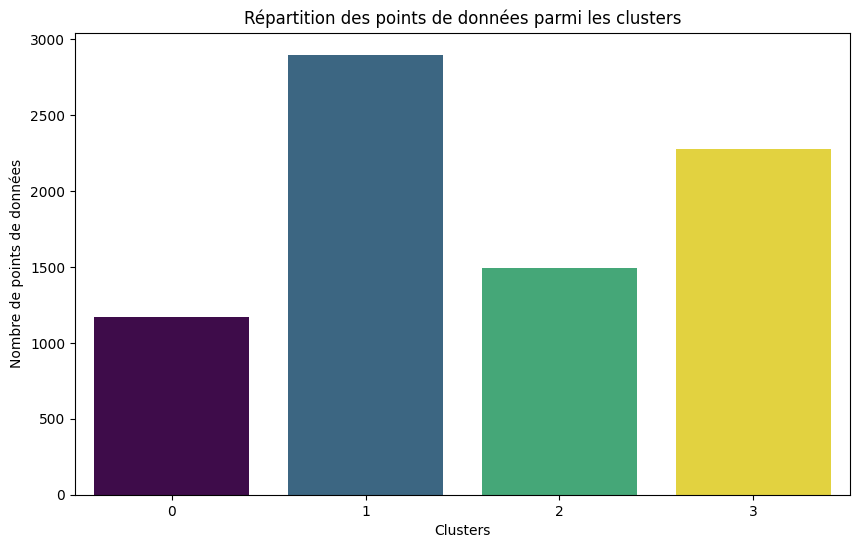

In [995]:
plt.figure(figsize=(10,6))
sns.countplot(x='clusters',hue='clusters',data=df,palette='viridis',legend=False)
plt.title('Répartition des points de données parmi les clusters')
plt.xlabel('Clusters')
plt.ylabel('Nombre de points de données')
plt.show()

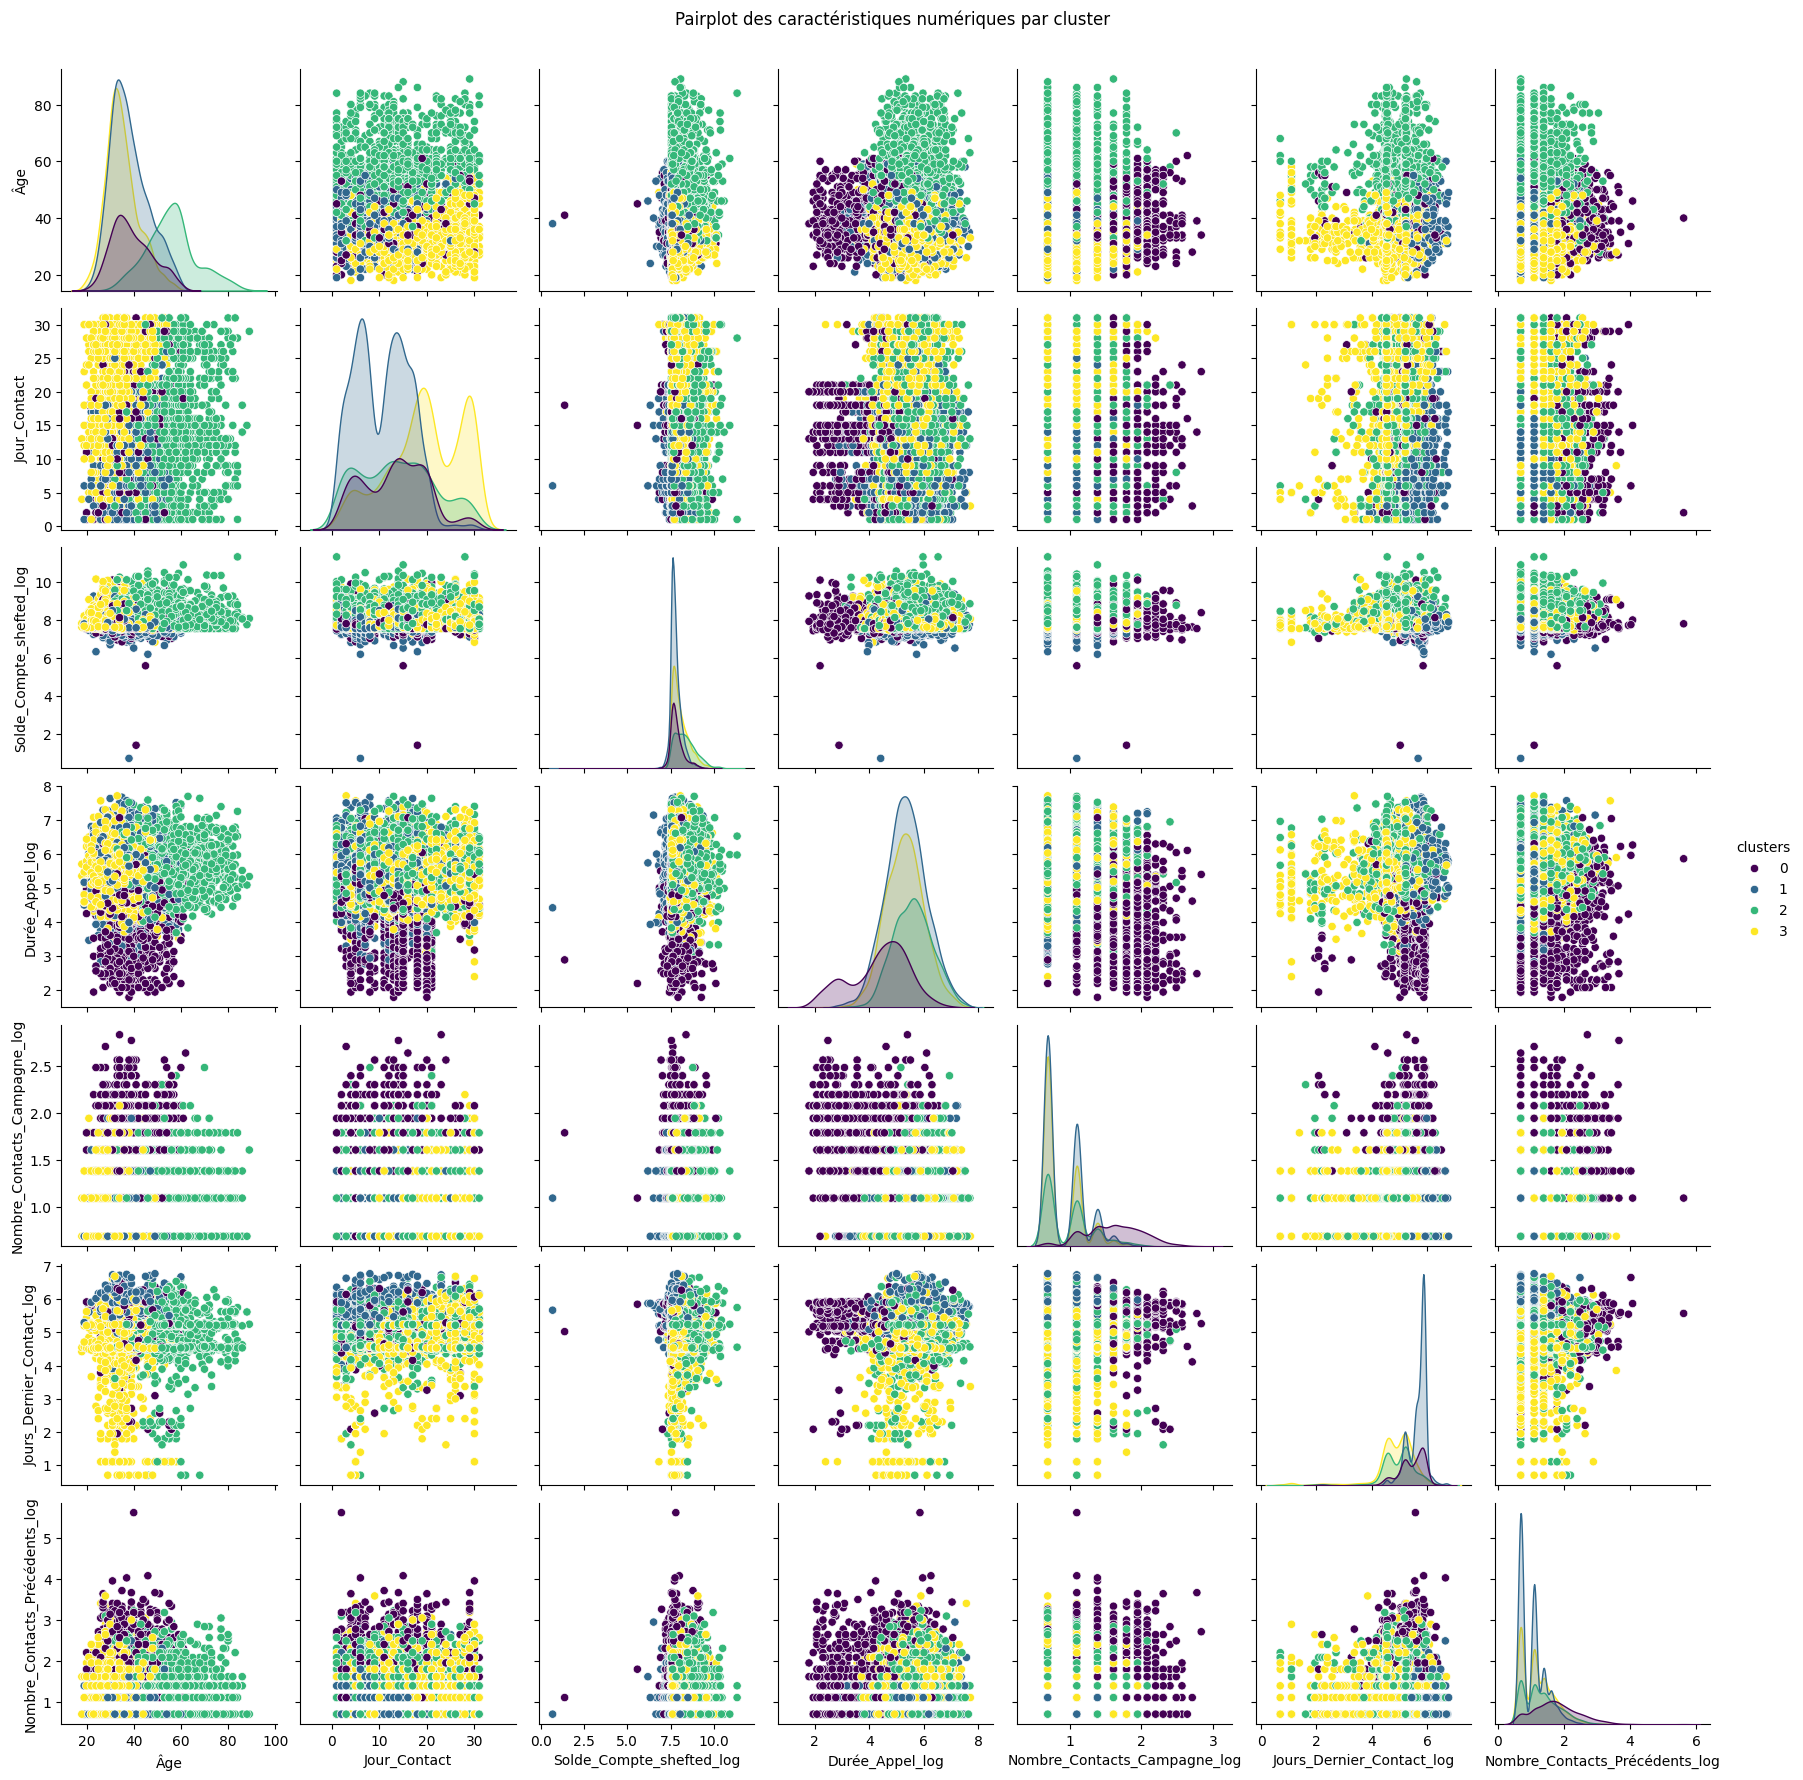

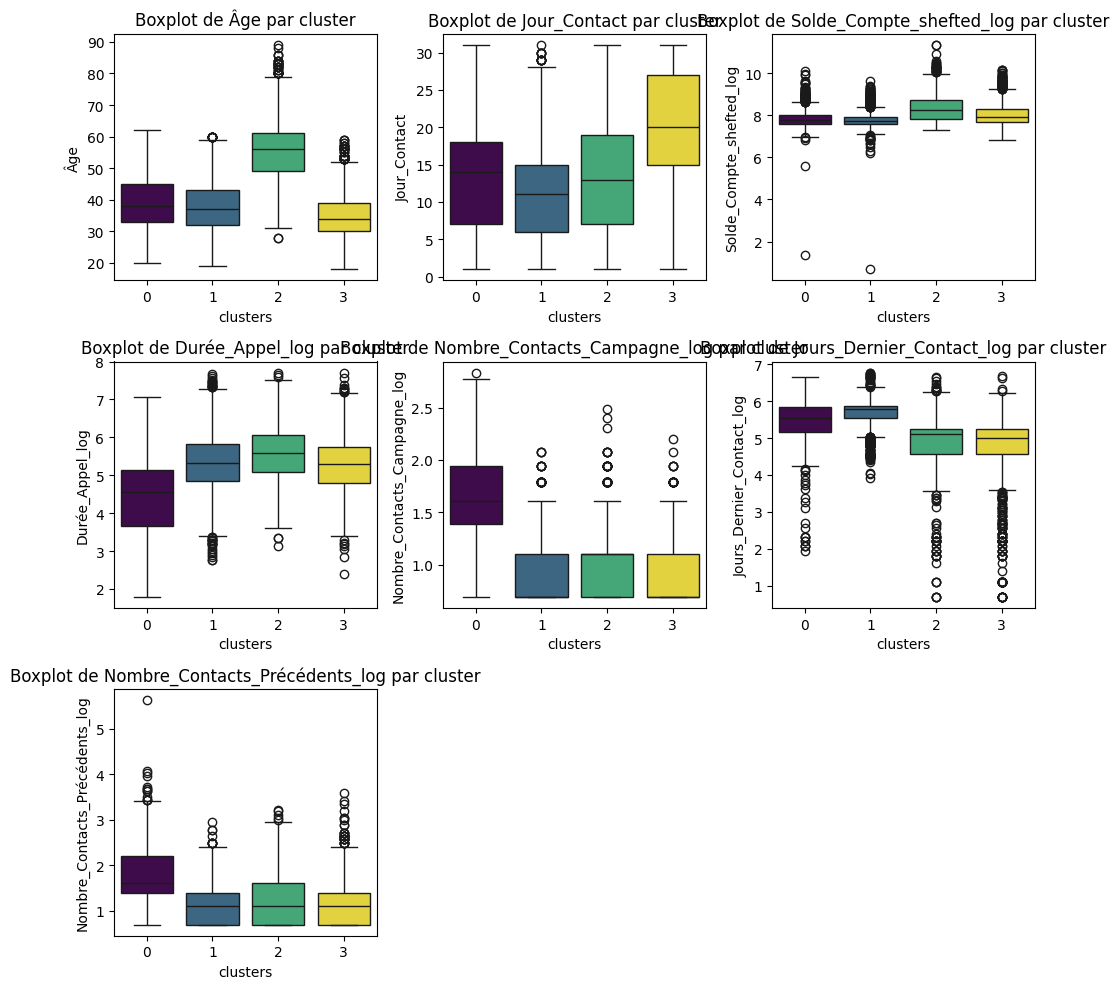

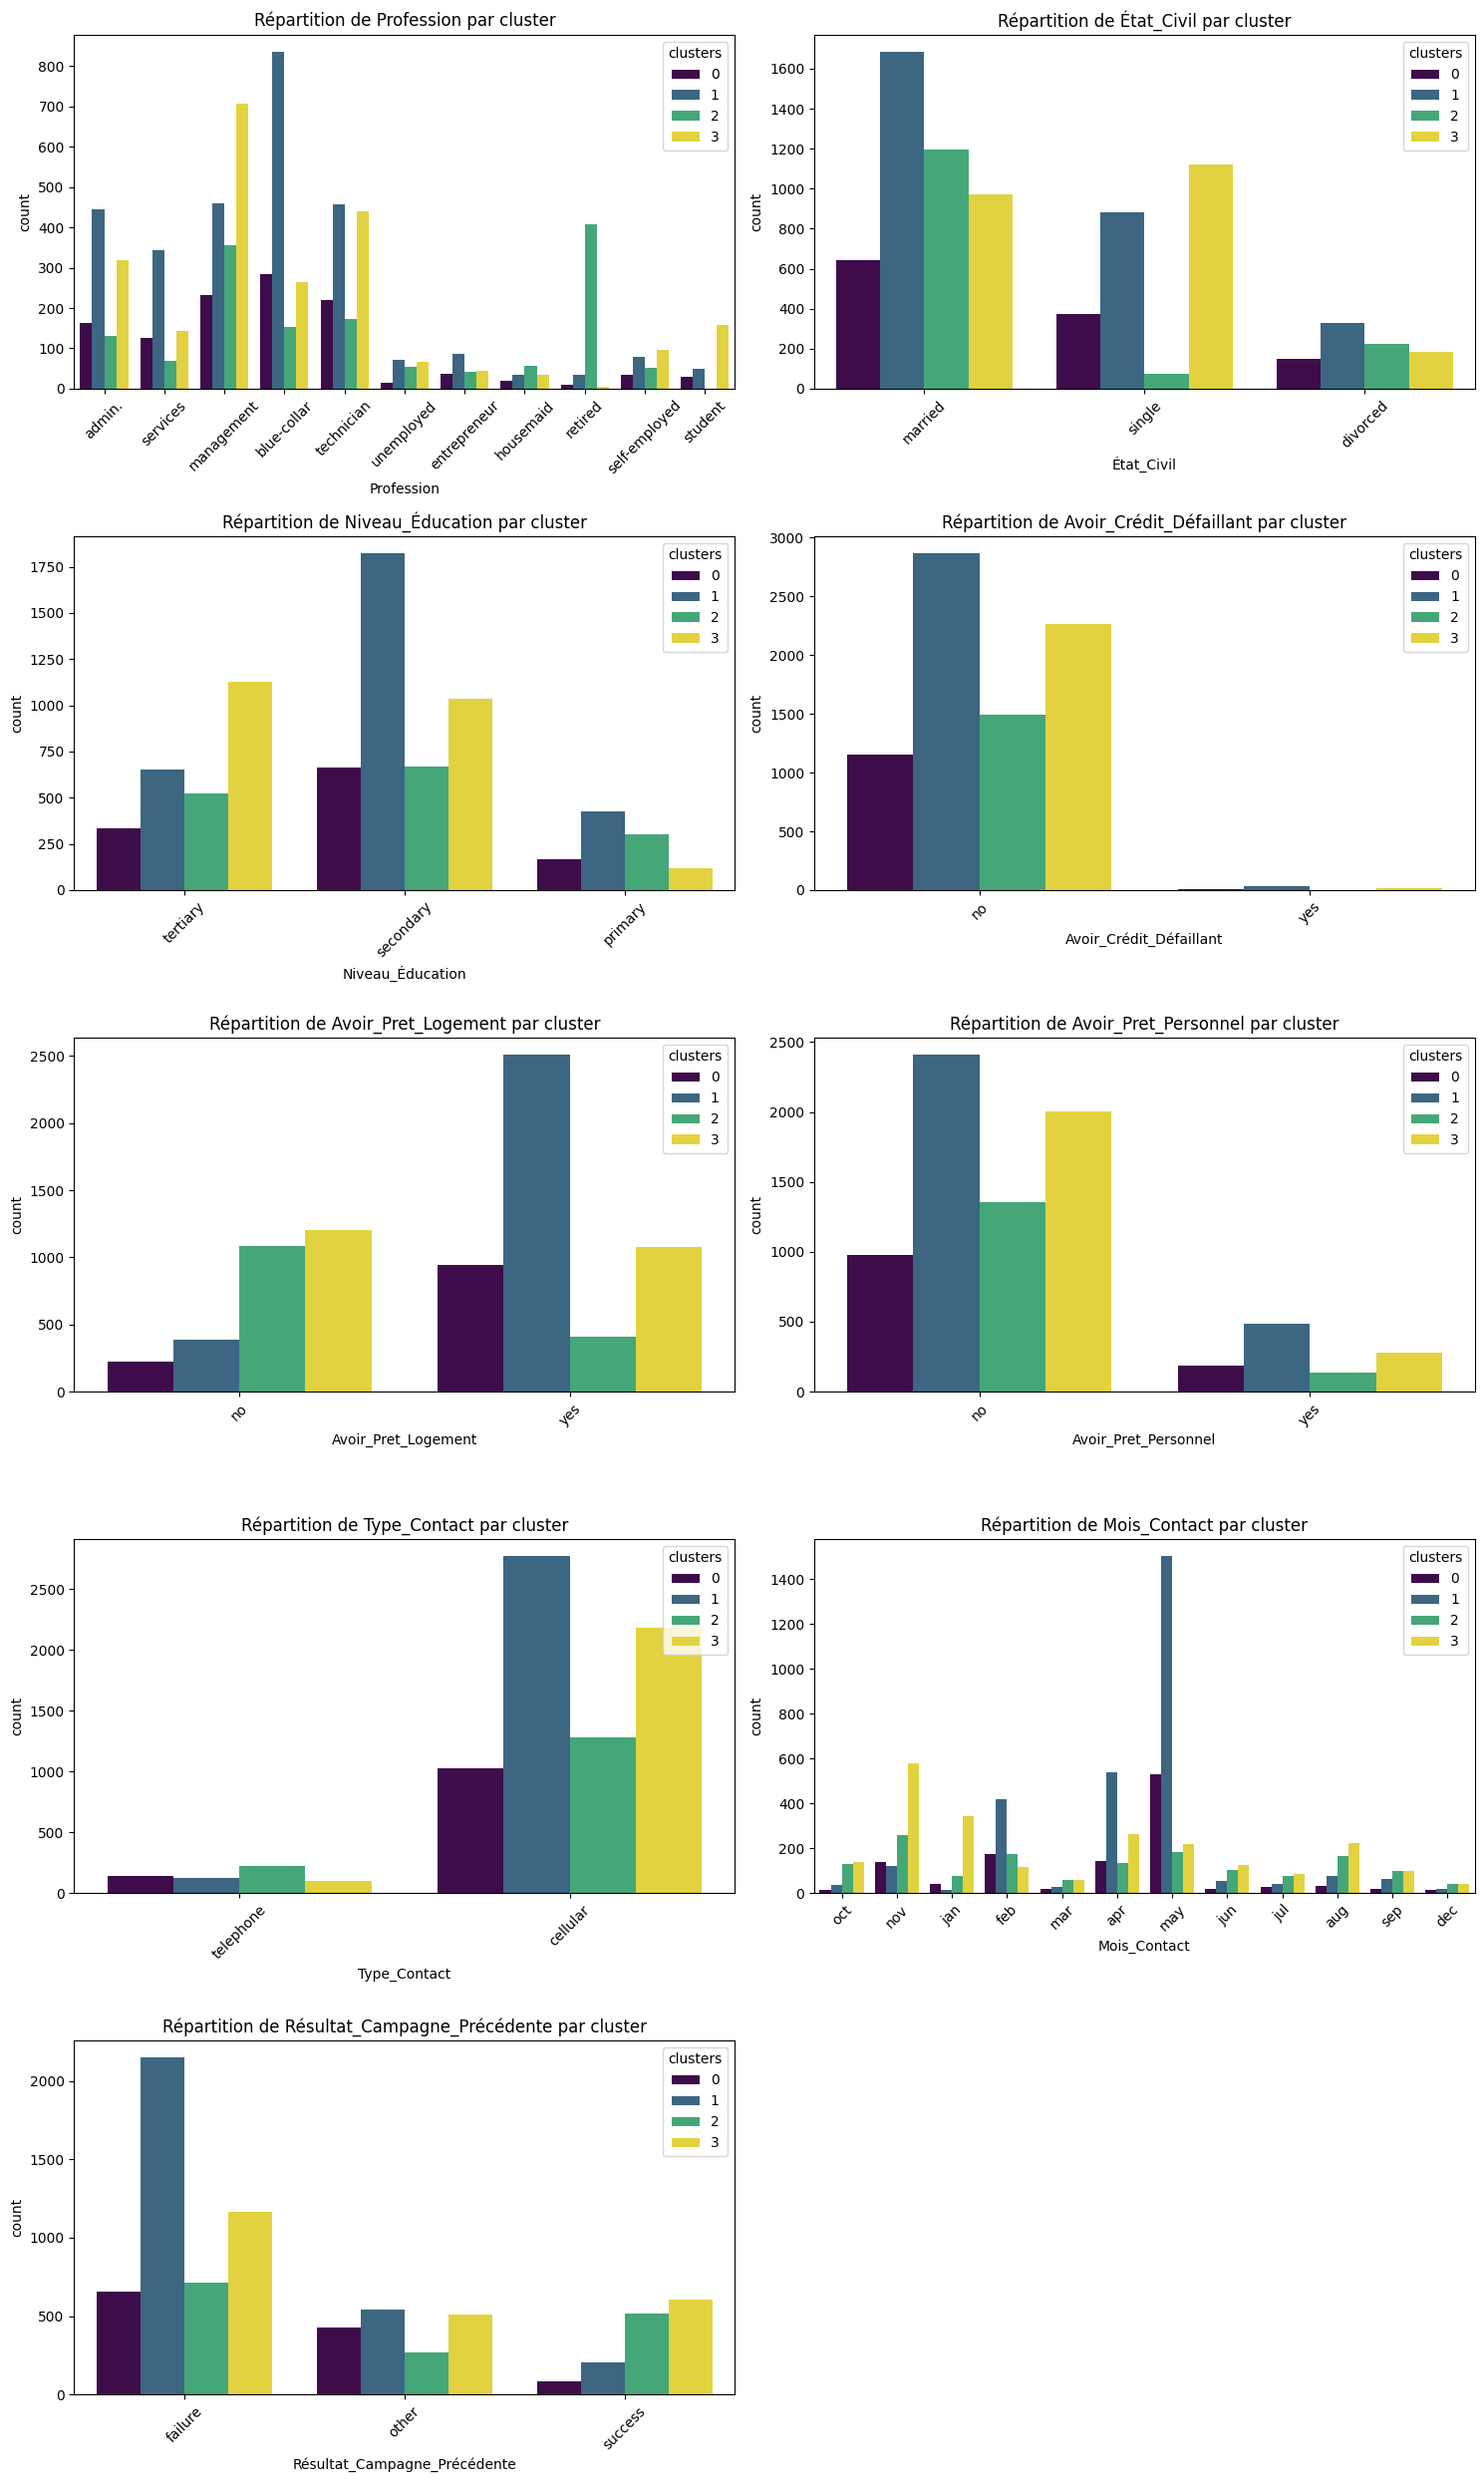

In [996]:
# Créer un pairplot pour visualiser la distribution des caractéristiques numériques par cluster
pairplot_data = df[numerical_features + ['clusters']]
sns.pairplot(pairplot_data, hue='clusters', palette='viridis')
plt.suptitle('Pairplot des caractéristiques numériques par cluster', y=1.02)
plt.show()

# Créer des boxplots pour comparer les caractéristiques numériques entre les clusters
plt.figure(figsize=(10, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='clusters', y=feature, hue='clusters', data=df, palette='viridis', legend=False)
    plt.title(f'Boxplot de {feature} par cluster')
plt.tight_layout()
plt.show()

# Visualiser les caractéristiques catégorielles par cluster
plt.figure(figsize=(15, 25))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(5, 2, i)
    sns.countplot(x=feature, hue='clusters', data=df, palette='viridis')
    plt.title(f'Répartition de {feature} par cluster')
    plt.legend(loc='upper right', title='clusters')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Analyse des Clusters

### Pairplot des Caractéristiques Numériques par Cluster

Les pairplots montrent les relations entre différentes caractéristiques numériques pour chaque cluster. 
1. **Âge et Solde_Compte** :
    - Le cluster 0 (violet) a tendance à avoir des individus plus âgés avec des soldes de compte variés.
    - Le cluster 3 (jaune) est majoritairement composé de jeunes individus avec des soldes de compte plus élevés.

2. **Jour_Contact et Durée_Appel** :
    - Les clusters montrent des différences significatives dans les jours de contact. Par exemple, le cluster 1 (bleu) a des jours de contact concentrés vers le début du mois, tandis que le cluster 3 (jaune) a des contacts plus tard dans le mois.
    - La durée des appels est plus élevée pour le cluster 0 (violet), tandis que les autres clusters montrent des durées variées.

3. **Nombre_Contacts_Campagne et Jours_Dernier_Contact** :
    - Le cluster 0 a un nombre de contacts de campagne plus élevé et un dernier contact plus récent.
    - Les autres clusters montrent des variations dans le nombre de contacts et les jours du dernier contact.

### Boxplots des Caractéristiques Numériques par Cluster

Les boxplots comparent les distributions des caractéristiques numériques entre les clusters. 

1. **Âge** :
    - Le cluster 2 (vert) montre une grande variation d'âge, avec une distribution plus étendue.
    - Le cluster 3 (jaune) est composé de jeunes individus principalement.

2. **Jour_Contact** :
    - Le cluster 3 a des jours de contact plus élevés, ce qui pourrait indiquer des campagnes ciblées plus tard dans le mois.
    - Le cluster 0 a des jours de contact plus bas, indiquant des contacts plus tôt dans le mois.

3. **Solde_Compte** :
    - Le cluster 0 montre des soldes de compte plus bas, avec des valeurs aberrantes élevées.
    - Les autres clusters ont des soldes de compte variés mais globalement plus élevés que le cluster 0.

4. **Durée_Appel** :
    - Le cluster 0 a des appels plus longs en moyenne.
    - Les clusters 1 et 2 montrent une variation similaire avec des appels légèrement plus courts.

5. **Nombre_Contacts_Campagne** :
    - Le cluster 0 montre un nombre de contacts de campagne plus élevé, avec une variabilité importante.
    - Les autres clusters ont moins de contacts de campagne.

6. **Jours_Dernier_Contact** :
    - Le cluster 0 a des jours de dernier contact plus récents.
    - Les autres clusters ont des jours de dernier contact plus anciens.

7. **Nombre_Contacts_Précédents** :
    - Le cluster 0 a un nombre de contacts précédents plus élevé.
    - Les autres clusters montrent une variation similaire avec un nombre de contacts précédents plus bas.

### Countplots des Caractéristiques Catégorielles par Cluster

Les countplots montrent la répartition des valeurs catégorielles dans chaque cluster. 

1. **Profession** :
    - Le cluster 1 (bleu) a une proportion élevée d'employés dans des rôles administratifs et de services.
    - Le cluster 3 (jaune) a une proportion plus élevée d'entrepreneurs et d'étudiants.

2. **État_Civil** :
    - Le cluster 0 a une proportion plus élevée de personnes mariées.
    - Le cluster 3 a une proportion plus élevée de personnes célibataires.

3. **Niveau_Éducation** :
    - Le cluster 3 a une proportion plus élevée de personnes avec une éducation secondaire.
    - Le cluster 1 a une proportion élevée de personnes avec une éducation tertiaire.

4. **Avoir_Crédit_Défaillant** :
    - La majorité des individus n'ont pas de crédit défaillant, mais le cluster 3 a une proportion plus élevée de personnes sans crédit défaillant.

5. **Avoir_Pret_Logement** :
    - Le cluster 1 a une proportion plus élevée de personnes avec un prêt logement.
    - Le cluster 3 a une proportion plus équilibrée entre ceux qui ont et n'ont pas de prêt logement.

6. **Avoir_Pret_Personnel** :
    - Le cluster 0 a moins de personnes avec un prêt personnel.
    - Le cluster 3 a une proportion plus élevée de personnes avec un prêt personnel.

7. **Type_Contact** :
    - Le type de contact 'cellular' est majoritaire dans tous les clusters, surtout dans le cluster 1.
    - Le type de contact 'telephone' est moins fréquent mais présent dans tous les clusters.

8. **Mois_Contact** :
    - Les contacts en mai sont particulièrement élevés dans le cluster 1, ce qui pourrait indiquer une campagne importante durant ce mois.
    - Les autres mois montrent des variations avec des pics dans différents clusters.

9. **Résultat_Campagne_Précédente** :
    - Le cluster 0 montre un taux d'échec plus élevé dans les campagnes précédentes.
    - Le cluster 3 montre un taux de succès plus élevé dans les campagnes précédentes.

### Conclusion

Ces visualisations montrent clairement les différences et similitudes entre les clusters en termes de caractéristiques numériques et catégorielles. 

En somme:

- **Cluster 0 (Violet)** : Composé d'individus plus âgés, avec des soldes de compte plus bas et un nombre de contacts de campagne plus élevé. Majoritairement des personnes mariées et employées dans des rôles administratifs.
- **Cluster 1 (Bleu)** : Majoritairement des individus avec une éducation tertiaire et des contacts cellulaires fréquents. Les contacts sont souvent en mai.
- **Cluster 2 (Vert)** : Une grande variation d'âge, avec des individus ayant des soldes de compte variés et des contacts plus tôt dans le mois.
- **Cluster 3 (Jaune)** : Majoritairement des jeunes avec une éducation secondaire, des contacts plus tard dans le mois et un taux de succès plus élevé dans les campagnes précédentes.

---

---


## Recommandations Basées sur l'Analyse des Clusters

### Cluster 0 (Violet)
- **Caractéristiques** : Il s'agit des individus plus âgés, avec des soldes de compte plus bas et un nombre de contacts de campagne plus élevé. Majoritairement des personnes mariées et employées dans des rôles administratifs.
- **Recommandations** :
  - **Offres Financières** : Proposer des produits financiers adaptés aux personnes âgées avec des soldes de compte plus bas, tels que des plans d'épargne ou des prêts personnels à taux réduit.
  - **Stratégies de Communication** : Utiliser des canaux de communication traditionnels, tels que le téléphone et le courrier postal, pour atteindre ce groupe. Les messages doivent être clairs et faciles à comprendre.
  - **Campagnes Ciblées** : Planifier les campagnes de contact plus tôt dans le mois, en utilisant des appels téléphoniques personnalisés.

### Cluster 1 (Bleu)
- **Caractéristiques** : Majoritairement des individus avec une éducation tertiaire et des contacts cellulaires fréquents. Les contacts sont souvent en mai.
- **Recommandations** :
  - **Éducation et Carrière** : Offrer des produits et services liés à l'éducation continue et à l'avancement de carrière, tels que des prêts étudiants ou des services de développement professionnel.
  - **Stratégies de Communication** : Utiliser des canaux numériques, tels que les SMS, les applications mobiles et les emails, pour atteindre ce groupe. Les messages doivent être informatifs et axés sur le développement personnel.
  - **Campagnes Ciblées** : Planifier des campagnes intensives en mai, offrant des promotions spéciales ou des réductions pour les services éducatifs.

### Cluster 2 (Vert)
- **Caractéristiques** : ils ont une grande variation d'âge, des individus ayant des soldes de compte variés et des contacts plus tôt dans le mois.
- **Recommandations** :
  - **Offres Diversifiées** : Proposer une gamme variée de produits financiers et de services pour répondre aux besoins diversifiés de ce groupe, allant des produits d'épargne à des investissements.
  - **Stratégies de Communication** : Utiliser une combinaison de canaux de communication traditionnels et numériques pour atteindre ce groupe. Les messages doivent être personnalisés en fonction des besoins spécifiques.
  - **Campagnes Ciblées** : Planifier les campagnes de contact plus tôt dans le mois, en utilisant une approche multicanal pour maximiser la portée.

### Cluster 3 (Jaune)
- **Caractéristiques** : Des jeunes avec une éducation secondaire, des contacts plus tard dans le mois et un taux de succès plus élevé dans les campagnes précédentes.
- **Recommandations** :
  - **Produits pour Jeunes** : Offrer des produits et services adaptés aux jeunes adultes, tels que des comptes d'épargne à haut rendement, des prêts étudiants et des conseils financiers pour les jeunes travailleurs.
  - **Stratégies de Communication** : Utiliser principalement des canaux numériques, tels que les réseaux sociaux, les applications mobiles et les emails, pour atteindre ce groupe. Les messages doivent être dynamiques et interactifs.
  - **Campagnes Ciblées** : Planifier les campagnes de contact plus tard dans le mois, en utilisant des offres spéciales et des promotions pour attirer l'attention des jeunes adultes.

## Construction de pipeline de prediction des clusters

In [997]:
#Crééation d'une classe de transformation personnalisée
from sklearn.base import BaseEstimator,TransformerMixin

class CustomTransform(BaseEstimator, TransformerMixin):
    def __init__(self, constante):
        self.constante = constante

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        # Ajout d'une constante à la colonne de Solde_Compte
        X['Solde_Compte_shefted'] = X['Solde_Compte'] + self.constante

        # Application d'une transformation log aux variables ayant une distribution de puissance
        for col in ['Solde_Compte_shefted', 'Durée_Appel', 'Nombre_Contacts_Campagne', 'Jours_Dernier_Contact', 'Nombre_Contacts_Précédents']:
            X[f'{col}_log'] = np.log1p(X[col].astype(float))  # Conversion en float pour éviter l'erreur

        # Suppression des colonnes ayant subi une transformation et devenant inutiles
        X = X.drop(columns=['Solde_Compte_shefted', 'Durée_Appel', 'Nombre_Contacts_Campagne', 'Jours_Dernier_Contact', 'Nombre_Contacts_Précédents'])

        return X

In [998]:
#Conctruction de mon pipeline de prediction de cluster
modele_pipeline = Pipeline(steps=[
    ('custom_transform', CustomTransform(constante=constante)),
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=3)),
    ('kmeans', KMeans(n_clusters=4, random_state=42))
])

In [999]:
# Entraîner le pipeline
modele_pipeline.fit(data)

Pipeline(steps=[('custom_transform', CustomTransform(constante=1885)),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Âge', 'Jour_Contact',
                                                   'Solde_Compte_shefted_log',
                                                   'Durée_Appel_log',
                                                   'Nombre_Contacts_Campagne_log',
                                                   'Jours_Dernier_Contact_log',
                                                   'Nombre_Contacts_Précédents_log']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Profession', 'État_Civil',
                                                   'Niveau_Éducation',
                                                   'Avoir_Crédit_Défaillant',
                                                   'Avoir_Pret_Logement',
                                                   'Avoir_Pret_Personnel',
                                                   'Type_Contact',
                                                   'Mois_Contact',
                                                   'Résultat_Campagne_Précédente'])])),
                ('pca', PCA(n_components=3)),
                ('kmeans', KMeans(n_clusters=4, random_state=42))])

In [1000]:
# je teste mon modele_pipeline
random_index=np.random.choice(df.index)
random_individual=df.loc[random_index]


print("******************************************************************************************************************")
print("Caracteristique d'Individu sélectionné au hasard dans le dataset après exploration, traitement et transformation:")
print("******************************************************************************************************************")
print(random_individual)

print("***************************************************")
print("***************************************************")

# je teste mon modele_pipeline
#random_index_=np.random.choice(my_data.index)
random_individual_=my_data.loc[random_index]

print("Caracteristique d'Individu sélectionné au hasard dans le dataset brut :")
print("*************************************************************************")

print(random_individual)
print(random_individual_)

******************************************************************************************************************
Caracteristique d'Individu sélectionné au hasard dans le dataset après exploration, traitement et transformation:
******************************************************************************************************************
Âge                                     40
Profession                        services
État_Civil                         married
Niveau_Éducation                  tertiary
Avoir_Crédit_Défaillant                 no
Avoir_Pret_Logement                     no
Avoir_Pret_Personnel                    no
Type_Contact                      cellular
Jour_Contact                             3
Mois_Contact                           jul
Résultat_Campagne_Précédente       failure
Solde_Compte_shefted_log          7.560601
Durée_Appel_log                   5.765191
Nombre_Contacts_Campagne_log      1.609438
Jours_Dernier_Contact_log         5.762051
Nombre_Cont

In [1001]:
random_individual_df = pd.DataFrame(random_individual).T.drop(columns=['clusters'])
random_individual_df

Âge Profession État_Civil Niveau_Éducation Avoir_Crédit_Défaillant  \
40469  40   services    married         tertiary                      no   

      Avoir_Pret_Logement Avoir_Pret_Personnel Type_Contact Jour_Contact  \
40469                  no                   no     cellular            3   

      Mois_Contact Résultat_Campagne_Précédente Solde_Compte_shefted_log  \
40469          jul                      failure                 7.560601   

      Durée_Appel_log Nombre_Contacts_Campagne_log Jours_Dernier_Contact_log  \
40469        5.765191                     1.609438                  5.762051   

      Nombre_Contacts_Précédents_log  
40469                       1.386294

In [1002]:
random_individual_df_ = pd.DataFrame(random_individual_).T
random_individual_df_

Âge Profession État_Civil Niveau_Éducation Avoir_Crédit_Défaillant  \
40469  40   services    married         tertiary                      no   

      Solde_Compte Avoir_Pret_Logement Avoir_Pret_Personnel Type_Contact  \
40469           35                  no                   no     cellular   

      Jour_Contact Mois_Contact Durée_Appel Nombre_Contacts_Campagne  \
40469            3          jul         318                        4   

      Jours_Dernier_Contact Nombre_Contacts_Précédents  \
40469                   317                          3   

      Résultat_Campagne_Précédente Souscription_Dépôt_Terminé  
40469                      failure                         no

In [1003]:
#random_individual_df_=transform(random_individual_)

#random_individual_df_=pd.DataFrame(random_individual_df_).T
#random_individual_df_=random_individual_df_.drop(columns=['Solde_Compte','Solde_Compte_shefted', 'Durée_Appel', 'Nombre_Contacts_Campagne', 'Jours_Dernier_Contact', 'Nombre_Contacts_Précédents'])
#random_individual_df_

In [1005]:
# Utiliser le modèle KMeans pour prédire le cluster
predicted_cluster = modele_pipeline.predict(random_individual_df_)

print(f"L'individu appartient au cluster: {predicted_cluster[0]}")

L'individu appartient au cluster: 1


# API

In [1006]:
import joblib
from flask import Flask,request,jsonify

In [1007]:
# Enregistrer le pipeline complet
joblib.dump(modele_pipeline, 'modele_pipeline.pkl')

['modele_pipeline.pkl']